In [616]:
import pandas as pd
df = pd.read_csv('USA_cars_datasets.csv')

In [617]:
print(df.head)

<bound method NDFrame.head of       Unnamed: 0  price      brand    model  year   title_status  mileage  \
0              0   6300     toyota  cruiser  2008  clean vehicle   274117   
1              1   2899       ford       se  2011  clean vehicle   190552   
2              2   5350      dodge      mpv  2018  clean vehicle    39590   
3              3  25000       ford     door  2014  clean vehicle    64146   
4              4  27700  chevrolet     1500  2018  clean vehicle     6654   
...          ...    ...        ...      ...   ...            ...      ...   
2494        2494   7800     nissan    versa  2019  clean vehicle    23609   
2495        2495   9200     nissan    versa  2018  clean vehicle    34553   
2496        2496   9200     nissan    versa  2018  clean vehicle    31594   
2497        2497   9200     nissan    versa  2018  clean vehicle    32557   
2498        2498   9200     nissan    versa  2018  clean vehicle    31371   

       color                  vin        lot 

In [618]:
print(df.columns)

Index(['Unnamed: 0', 'price', 'brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')


In [619]:
df.rename(columns={'S': 'Id'},inplace=True)
# df.rename(columns={'S': 'Id','price':'Price'},inplace=True)
df.head

<bound method NDFrame.head of       Unnamed: 0  price      brand    model  year   title_status  mileage  \
0              0   6300     toyota  cruiser  2008  clean vehicle   274117   
1              1   2899       ford       se  2011  clean vehicle   190552   
2              2   5350      dodge      mpv  2018  clean vehicle    39590   
3              3  25000       ford     door  2014  clean vehicle    64146   
4              4  27700  chevrolet     1500  2018  clean vehicle     6654   
...          ...    ...        ...      ...   ...            ...      ...   
2494        2494   7800     nissan    versa  2019  clean vehicle    23609   
2495        2495   9200     nissan    versa  2018  clean vehicle    34553   
2496        2496   9200     nissan    versa  2018  clean vehicle    31594   
2497        2497   9200     nissan    versa  2018  clean vehicle    32557   
2498        2498   9200     nissan    versa  2018  clean vehicle    31371   

       color                  vin        lot 

In [620]:
print(df['country'].unique())

[' usa' ' canada']


In [621]:
df['country'].replace({' usa': 'USA',' canada': 'Canada'},inplace=True)
print(df['country'].unique())

['USA' 'Canada']


In [622]:
df2=df.query("country=='USA'")
# print(df2['country'].unique())

In [623]:
df2.columns

Index(['Unnamed: 0', 'price', 'brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')

In [624]:
df3=df2.drop(['vin','lot','condition','country'],axis=1)
df3.columns

Index(['Unnamed: 0', 'price', 'brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'state'],
      dtype='object')

In [625]:
df3.head(1)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,state
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,new jersey


In [626]:
print(df3.iloc[1])

Unnamed: 0                  1
price                    2899
brand                    ford
model                      se
year                     2011
title_status    clean vehicle
mileage                190552
color                  silver
state               tennessee
Name: 1, dtype: object


In [627]:
#finding data types
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2492 entries, 0 to 2498
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2492 non-null   int64 
 1   price         2492 non-null   int64 
 2   brand         2492 non-null   object
 3   model         2492 non-null   object
 4   year          2492 non-null   int64 
 5   title_status  2492 non-null   object
 6   mileage       2492 non-null   int64 
 7   color         2492 non-null   object
 8   state         2492 non-null   object
dtypes: int64(4), object(5)
memory usage: 194.7+ KB


In [628]:
#finidng missing valies
print(df3.isna().sum())

Unnamed: 0      0
price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
state           0
dtype: int64


In [629]:
#dropping missing values
# df3.dropna(inplace=True) drop missing values

# df3.fillna('0',inplace=True) #fill missing values

print(df3.isna().sum())

Unnamed: 0      0
price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
state           0
dtype: int64


In [630]:
df3['price'].fillna(df3['price'].quantile(0.5),inplace=True) #fill missing values

In [631]:
df3.head(1)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,state
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,new jersey


In [632]:
#labvel encoding

from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
df3['title_status_enc']=encoder.fit_transform(df3['title_status'])
df3['color_enc']=encoder.fit_transform(df3['color'])
# df3['title_status']=encoder.fit_transform(df3['title_status'])
print(df3.head(5))

   Unnamed: 0  price      brand    model  year   title_status  mileage  \
0           0   6300     toyota  cruiser  2008  clean vehicle   274117   
1           1   2899       ford       se  2011  clean vehicle   190552   
2           2   5350      dodge      mpv  2018  clean vehicle    39590   
3           3  25000       ford     door  2014  clean vehicle    64146   
4           4  27700  chevrolet     1500  2018  clean vehicle     6654   

    color       state  title_status_enc  color_enc  
0   black  new jersey                 0          2  
1  silver   tennessee                 0         39  
2  silver     georgia                 0         39  
3    blue    virginia                 0          4  
4     red     florida                 0         34  


In [633]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler=MinMaxScaler()
df3['mileage_enc']=scaler.fit_transform(df3[['mileage']])

df3.head(5)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,state,title_status_enc,color_enc,mileage_enc
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,new jersey,0,2,0.269287
1,1,2899,ford,se,2011,clean vehicle,190552,silver,tennessee,0,39,0.187194
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,georgia,0,39,0.038892
3,3,25000,ford,door,2014,clean vehicle,64146,blue,virginia,0,4,0.063016
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,florida,0,34,0.006537


In [634]:
scaler=StandardScaler()
df3['mileage_enc']=scaler.fit_transform(df3[['mileage']])

df3.head(5)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,state,title_status_enc,color_enc,mileage_enc
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,new jersey,0,2,3.710575
1,1,2899,ford,se,2011,clean vehicle,190552,silver,tennessee,0,39,2.312587
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,georgia,0,39,-0.212909
3,3,25000,ford,door,2014,clean vehicle,64146,blue,virginia,0,4,0.197896
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,florida,0,34,-0.763907


In [635]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p, validate=True)
df3['mileage_enc_tr']=transformer.transform(df3[['mileage_enc']])

df3.head(5)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


,Unnamed: 0,price,brand,model,year,title_status,mileage,color,state,title_status_enc,color_enc,mileage_enc,mileage_enc_tr
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,new jersey,0,2,3.710575,1.549810
1,1,2899,ford,se,2011,clean vehicle,190552,silver,tennessee,0,39,2.312587,1.197729
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,georgia,0,39,-0.212909,-0.239412
3,3,25000,ford,door,2014,clean vehicle,64146,blue,virginia,0,4,0.197896,0.180567
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,florida,0,34,-0.763907,-1.443531


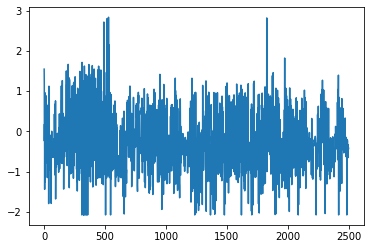

In [636]:
import matplotlib.pyplot as plt

plt.plot(df3['mileage_enc_tr'])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mileage_enc_tr', ylabel='Density'>

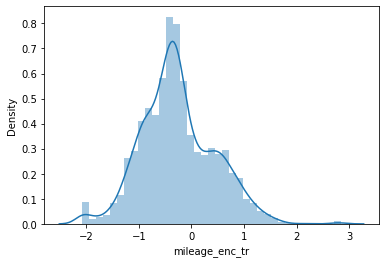

In [637]:
import seaborn as sns

sns.distplot(df3['mileage_enc_tr'])

In [638]:
bins=[2000,2005,2010,2015,2020]
df3['age_binned']=pd.cut(df3['year'],bins=bins)

df3.head(5)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,state,title_status_enc,color_enc,mileage_enc,mileage_enc_tr,age_binned
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,new jersey,0,2,3.710575,1.549810,"(2005, 2010]"
1,1,2899,ford,se,2011,clean vehicle,190552,silver,tennessee,0,39,2.312587,1.197729,"(2010, 2015]"
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,georgia,0,39,-0.212909,-0.239412,"(2015, 2020]"
3,3,25000,ford,door,2014,clean vehicle,64146,blue,virginia,0,4,0.197896,0.180567,"(2010, 2015]"
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,florida,0,34,-0.763907,-1.443531,"(2015, 2020]"


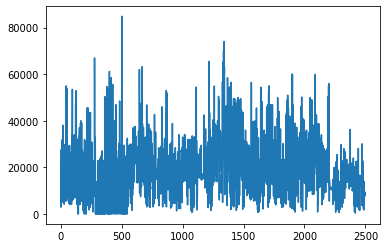

In [639]:
plt.plot(df3['price'])
plt.show()

In [640]:
print(df3['price'].mean())
print(df3['price'].max())
print(df3['price'].min())

18735.116773675763
84900
0


(10000, 20000]     878
(20000, 30000]     634
(5000, 10000]      304
(0, 5000]          268
(30000, 40000]     226
(40000, 50000]      90
(50000, 60000]      37
(60000, 70000]      10
(70000, 80000]       1
(80000, 90000]       1
(90000, 100000]      0
Name: price_binned, dtype: int64


<AxesSubplot:>

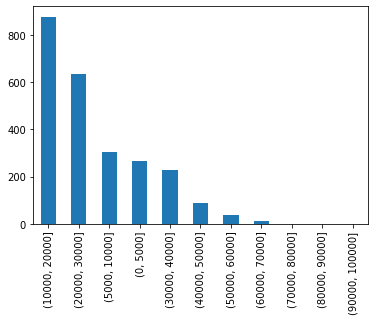

In [641]:
bins=[0,5000,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000]
df3['price_binned']=pd.cut(df3['price'],bins=bins)
df3.head(5)


print(df3['price_binned'].value_counts())
df3['price_binned'].value_counts().plot(kind='bar')

<AxesSubplot:>

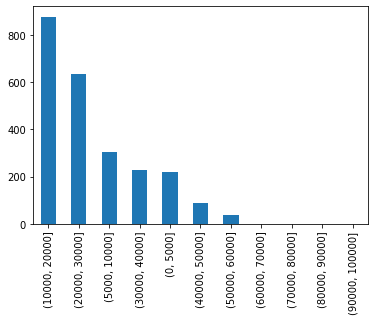

In [642]:
df4=df3.query('price<60000')

df4['price_binned'].value_counts().plot(kind='bar')




/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

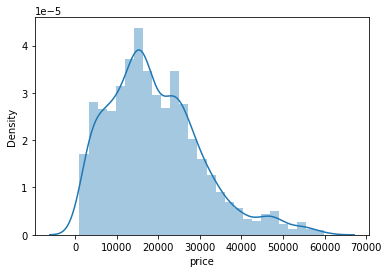

In [643]:
sns.distplot(df4['price'])